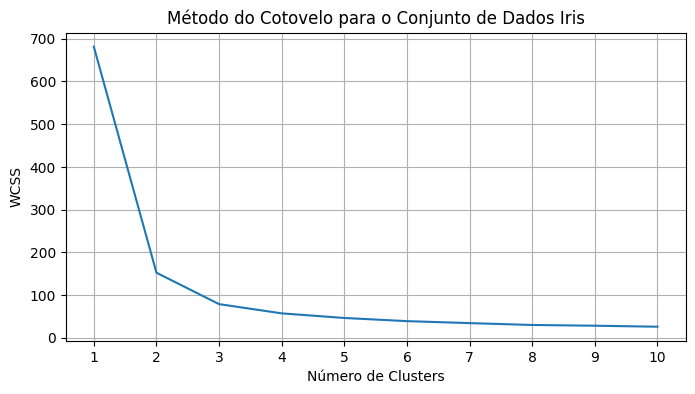

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data

# Aplicando o método do cotovelo para encontrar o número ótimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo para o Conjunto de Dados Iris')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Soma dos quadrados dentro do cluster
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


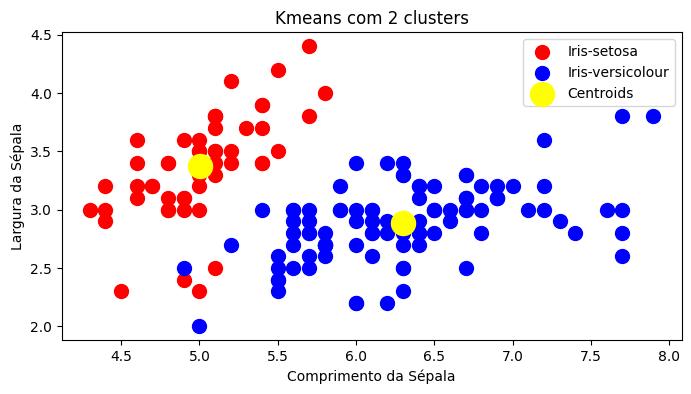

In [10]:
# Plotando kmeans com 2 clusters, real x predito
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(8, 4))
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Kmeans com 2 clusters')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend()
plt.show()


In [11]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score
y_true = iris.target
y_pred = pred_y
print('Acurácia:', accuracy_score(y_true, y_pred))


Acurácia: 0.6466666666666666


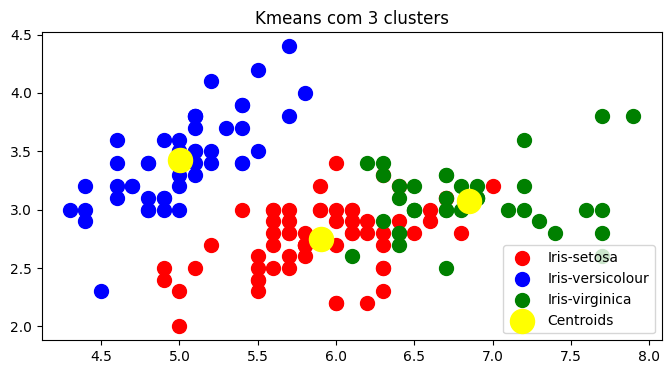

In [8]:
# Plotando kmeans com 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(8, 4))
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Kmeans com 3 clusters')
plt.legend()
plt.show()


In [9]:
# Acurácia do modelo
from sklearn.metrics import accuracy_score
y_true = iris.target
y_pred = pred_y
print('Acurácia:', accuracy_score(y_true, y_pred))


Acurácia: 0.24


In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data

# Aplicar o k-means com um número específico de clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Calcular o Coeficiente de Silhueta
silhouette_avg = silhouette_score(X, pred_y)
print(f"Para n_clusters = {n_clusters}, o coeficiente médio de silhueta é: {silhouette_avg:.2f}")


Para n_clusters = 3, o coeficiente médio de silhueta é: 0.55


Para n_clusters = 2, o coeficiente médio de silhueta é: 0.68
Para n_clusters = 3, o coeficiente médio de silhueta é: 0.55
Para n_clusters = 4, o coeficiente médio de silhueta é: 0.50
Para n_clusters = 5, o coeficiente médio de silhueta é: 0.49
Para n_clusters = 6, o coeficiente médio de silhueta é: 0.36
Para n_clusters = 7, o coeficiente médio de silhueta é: 0.36
Para n_clusters = 8, o coeficiente médio de silhueta é: 0.36
Para n_clusters = 9, o coeficiente médio de silhueta é: 0.34
Para n_clusters = 10, o coeficiente médio de silhueta é: 0.32


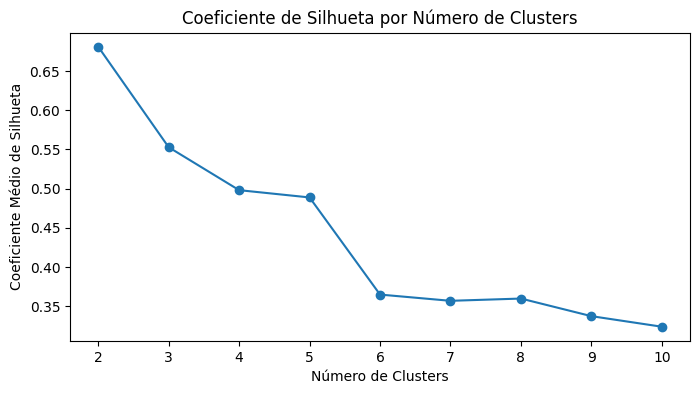

In [14]:
silhouette_avgs = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, pred_y)
    silhouette_avgs.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, o coeficiente médio de silhueta é: {silhouette_avg:.2f}")

# Plotar o gráfico do coeficiente médio de silhueta para diferentes números de clusters
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_avgs, marker='o')
plt.title('Coeficiente de Silhueta por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente Médio de Silhueta')
plt.show()


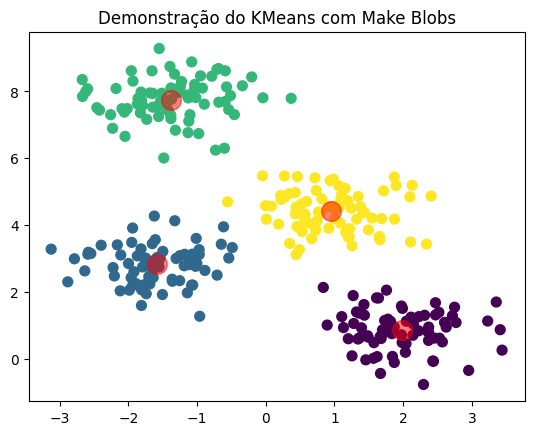

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Gerar dados sintéticos com make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Aplicar o k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotar os dados e os centros dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Demonstração do KMeans com Make Blobs')
plt.show()


C:\Users\flavi\AppData\Local\Temp\ipykernel_10864\3828814478.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


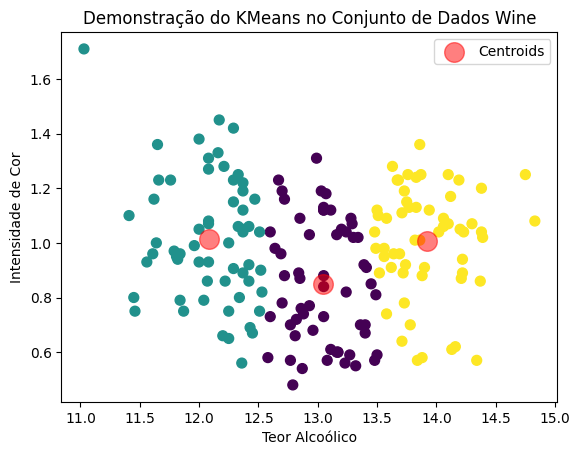

In [16]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Carregar o conjunto de dados Wine
wine = load_wine()
X = wine.data[:, [0, 10]]  # Selecionar apenas duas características: teor alcoólico e intensidade de cor

# Aplicar o k-means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotar os dados e os centros dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Centroids')
plt.title('Demonstração do KMeans no Conjunto de Dados Wine')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Intensidade de Cor')
plt.legend()
plt.show()
